<a href="https://colab.research.google.com/github/joelpawar08/All-DL-and-ML-Alogs-with-Examples/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 66.67%


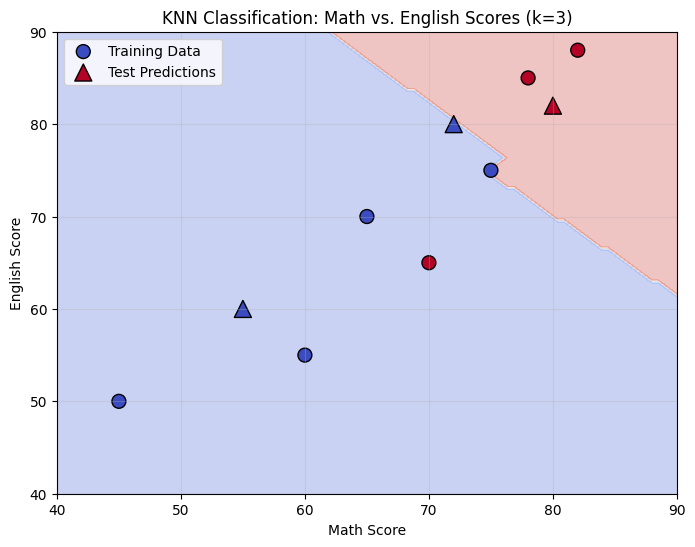


New Student (Math: 75, English: 80)
Prediction: PASS


In [1]:
# Import necessary libraries
# numpy for numerical operations, matplotlib for plotting, sklearn for KNN and utilities
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Create a self-made dataset
# Simulate student exam scores (Math, English) vs. Pass/Fail outcomes
# Features: Math score, English score; Label: Pass (1) or Fail (0)
np.random.seed(42)  # For reproducibility
math_scores = np.array([45, 55, 60, 65, 70, 72, 75, 78, 80, 82])
english_scores = np.array([50, 60, 55, 70, 65, 80, 75, 85, 82, 88])
scores = np.column_stack((math_scores, english_scores))  # Combine into 2D feature matrix
pass_fail = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1])  # Labels: Pass (1) or Fail (0)

# Step 2: Split data into training and testing sets
# 70% training, 30% testing to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(scores, pass_fail, test_size=0.3, random_state=42)

# Step 3: Create and fit the KNN model
# KNN classifies based on the k nearest neighbors' labels
model = KNeighborsClassifier(n_neighbors=3)  # Use 3 nearest neighbors
model.fit(X_train, y_train)  # Train the model on training data

# Step 4: Make predictions
# Predict pass/fail for test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Accuracy measures % of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Step 6: Visualize the data and decision boundary
# Plot data points and decision regions for 2D feature space
plt.figure(figsize=(8, 6))
# Create a mesh grid for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(40, 90, 100), np.linspace(40, 90, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Predict for each grid point
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Plot decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, edgecolors='k', cmap='coolwarm', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=150, marker='^', edgecolors='k', cmap='coolwarm', label='Test Predictions')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('KNN Classification: Math vs. English Scores (k=3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 7: Predict for a new student
new_student = np.array([[75, 80]])  # Math: 75, English: 80
prediction = model.predict(new_student)
print(f"\nNew Student (Math: 75, English: 80)")
print(f"Prediction: {'PASS' if prediction[0] == 1 else 'FAIL'}")

# Explanation of KNN:
# - KNN is a lazy learning algorithm that classifies a point based on the majority label of its k nearest neighbors
# - Distance metric: Typically Euclidean distance
# - Choosing k: Small k may overfit, large k may underfit
# - Use case: Simple classification tasks, recommendation systems, anomaly detection